Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargando datos

In [41]:
expuestos = pd.read_csv('https://raw.githubusercontent.com/JavierBurgos-web/Alll_Proyecto_Finanzas/main/2_data/BD_Expuestos.txt', sep='\t', encoding='latin-1')
sociodemograficos = pd.read_csv('https://raw.githubusercontent.com/JavierBurgos-web/Alll_Proyecto_Finanzas/main/2_data/BD_Sociodemograficas.txt', sep='\t', encoding='latin-1')
siniestros = pd.read_csv('https://media.githubusercontent.com/media/JavierBurgos-web/Alll_Proyecto_Finanzas/main/2_data/DB_Siniestros.txt', sep=',', encoding='latin-1')

##### **1. CONCATENACION DE BASES**

In [42]:
sociodemograficos = sociodemograficos.drop_duplicates(subset='Asegurado_Id', keep='first')

df = pd.merge(expuestos, sociodemograficos, on='Asegurado_Id', how='inner')
df = pd.merge(df, siniestros, on='Asegurado_Id', how='inner')
display(df)

,Asegurado_Id,Poliza_Asegurado_Id,FECHA_INICIO,FECHA_CANCELACION,FECHA_FIN,Mujer,FechaNacimiento,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Mes_Pago,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado
0,11885152,141320760,2018/01/01,NaN,2019/12/31,0,4/07/1974,Bogota,0,0,0,0,0,201807,CONSULTA EXTERNA,9,DIAGNÃSTICO PENDIENTE,1,4.395772e+05
1,763957,162532851,2018/01/01,NaN,2019/12/31,0,10/02/1968,Medellin,0,0,0,0,0,201902,LABORATORIO CLINICO,9,DIAGNÃSTICO PENDIENTE,1,4.231473e+05
2,763957,162532851,2018/01/01,NaN,2019/12/31,0,10/02/1968,Medellin,0,0,0,0,0,201812,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,1,4.581114e+05
3,763957,162532851,2018/01/01,NaN,2019/12/31,0,10/02/1968,Medellin,0,0,0,0,0,201902,EXAMENES DE DIAGNOSTICO,Z108,OTROS CONTROLES GENERALES DE SALUD DE RUTINA D...,1,4.074159e+05
4,763957,162532851,2018/01/01,NaN,2019/12/31,0,10/02/1968,Medellin,0,0,0,0,0,201903,FISIOTERAPIA ILIMITADA,9,DIAGNÃSTICO PENDIENTE,5,4.990100e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779684,34905586,161843515,2018/01/01,NaN,2019/12/31,0,25/11/1967,Bogota,0,0,0,0,0,201911,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,2,9.311852e+05
3779685,34905586,161843515,2018/01/01,NaN,2019/12/31,0,25/11/1967,Bogota,0,0,0,0,0,201912,CONSULTA DE URGENCIAS,9,DIAGNÃSTICO PENDIENTE,1,7.523936e+05
3779686,34905586,161843515,2018/01/01,NaN,2019/12/31,0,25/11/1967,Bogota,0,0,0,0,0,201910,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,1,5.176030e+05
3779687,34905586,161843515,2018/01/01,NaN,2019/12/31,0,25/11/1967,Bogota,0,0,0,0,0,201910,LABORATORIO CLINICO,9,DIAGNÃSTICO PENDIENTE,1,8.801258e+05


#### **2. TRANSFORMACIONES**

##### **2.1. Inputación y eliminación de información**

In [29]:
# Eliminación
## Elimina variable 'Poliza_Asegurado_Id' y 'Mes_Pago' no aporta.
df.drop(['Poliza_Asegurado_Id'], inplace = True, axis = 1)
df.drop(df['Mes_Pago'], inplace = True, axis = 1)
##Elimina registros asociados a la categoría 'Sin Información' de la variable 'Ciudad' y también respecto a los nulos
df = df[df['Ciudad'] != 'Sin Información']
df = df.dropna(subset=['Ciudad'])
## Elimina registros asociados al valor '-1' (registros nulos) de la variable 'Mujer' 
df = df[df['Mujer'] != -1]
## Elimina registros asociados al valor '-1' (registros nulos) de la variable 'Diagnostico_Codigo' 
df = df.loc[df['Diagnostico_Codigo'] != '-1']
## Reasigna la categoría '0' a '9', uniendolas puesto que las dos representan la categoría 'Diagnostico pendiente'
df.Diagnostico_Codigo = df.Diagnostico_Codigo.replace({"9":"0"})

# Imputación
df['FECHA_CANCELACION'] = df['FECHA_CANCELACION'].fillna(df['FECHA_FIN'])

##### **2.2. Reasignación de tipo y nombre de variables**

In [31]:
# Reasignar tipo a variables de fechas
df['FECHA_INICIO'] = pd.to_datetime(df['FECHA_INICIO'], format='%Y/%m/%d')
df['FECHA_CANCELACION'] = pd.to_datetime(df['FECHA_CANCELACION'], format='%Y/%m/%d')
df['FECHA_FIN'] = pd.to_datetime(df['FECHA_FIN'], format='%Y/%m/%d')
df['FechaNacimiento'] = pd.to_datetime(df['FechaNacimiento'], format='%d/%m/%Y')

# Renombrar
df = df.rename(columns={'Mujer': 'genero'})
df = df.rename(columns={'FechaNacimiento': 'fecha_nacimiento'})
df = df.rename(columns={'Poliza_Asegurado_Id': 'poliza_id'})

#Reasignar nombres bajo la nomenclatura Snake Case
df.columns = df.columns.str.lower().str.replace(' ', '_')

##### **2.2. Segmentación**

[Anexo para la segmentación en función de la edad.](https://www.minsalud.gov.co/proteccionsocial/Paginas/cicloVida.aspx#:~:text=Persona%20Mayor%20(60%20a%C3%B1os%20o%20mas)%20envejecimiento%20y%20vejez)

In [29]:
print(f"La información de polizas corresponden al periodo comprendido entre {df['fecha_inicio'].min().year} y {df['fecha_fin'].max().year}, \n"
      f"por lo cual la edad de los usuarios se calculará hasta el año {df['fecha_fin'].max().year} \n")

La información de polizas correponden al periodo comprendido entre 2018 y 2019, 
por lo cual la edad de los usuarios se calculará hasta el año 2019 



In [32]:
# SEGMENTACIÓN EN FUNCIÓN DE LA EDAD 

fecha_referencia = pd.Timestamp('2019-12-31')
df['edad'] = fecha_referencia.year - df['fecha_nacimiento'].dt.year

def segmentar_edad(edad):
    if edad <= 5:
        return 'Primera infancia'
    elif 6 <= edad <= 11:
        return 'Infancia'
    elif 12 <= edad <= 18:
        return 'Adolescencia'
    elif 19 <= edad <= 26:
        return 'Juventud'
    elif 27 <= edad <= 59:
        return 'Adultez'
    else:
        return 'Persona mayor'

df['segmento_edad'] = df['edad'].apply(segmentar_edad)
df = df.drop(["fecha_nacimiento","edad"],axis=1)


# SEGMENTACIÓN EN FUNCIÓN DE LA VARIABLE 'diagnostico_codigo'


# TIEMPO ACTIVO DE LA POLIZA EN MESES
df['tiempo_poliza']=(df['fecha_cancelacion']-df['fecha_inicio']).dt.month


In [33]:
print(f"La base de datos contiene {df.shape[0]} observaciones y {df.shape[1]} variables, \n" 
      f"dentro de la cual se presentan {df.duplicated().sum()} registros duplicados, \n" 
      f"y {df.isnull().sum().sum()} observaciones vacías. \n")

display(df)

La base de datos contiene 3779049 observaciones y 19 variables, 
dentro de la cual se presentan 0 registros duplicados, 
y 0 observaciones vacías. 



,asegurado_id,poliza_id,fecha_inicio,fecha_cancelacion,fecha_fin,genero,ciudad,cancer,epoc,diabetes,hipertension,enf_cardiovascular,mes_pago,reclamacion,diagnostico_codigo,diagnostico_desc,eventos,valor_pagado,segmento_edad
0,11885152,141320760,2018-01-01,2019-12-31,2019-12-31,0,Bogota,0,0,0,0,0,2018/07,CONSULTA EXTERNA,9,DIAGNÃSTICO PENDIENTE,1,4.395772e+05,Adultez
1,763957,162532851,2018-01-01,2019-12-31,2019-12-31,0,Medellin,0,0,0,0,0,2019/02,LABORATORIO CLINICO,9,DIAGNÃSTICO PENDIENTE,1,4.231473e+05,Adultez
2,763957,162532851,2018-01-01,2019-12-31,2019-12-31,0,Medellin,0,0,0,0,0,2018/12,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,1,4.581114e+05,Adultez
3,763957,162532851,2018-01-01,2019-12-31,2019-12-31,0,Medellin,0,0,0,0,0,2019/02,EXAMENES DE DIAGNOSTICO,Z108,OTROS CONTROLES GENERALES DE SALUD DE RUTINA D...,1,4.074159e+05,Adultez
4,763957,162532851,2018-01-01,2019-12-31,2019-12-31,0,Medellin,0,0,0,0,0,2019/03,FISIOTERAPIA ILIMITADA,9,DIAGNÃSTICO PENDIENTE,5,4.990100e+05,Adultez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779684,34905586,161843515,2018-01-01,2019-12-31,2019-12-31,0,Bogota,0,0,0,0,0,2019/11,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,2,9.311852e+05,Adultez
3779685,34905586,161843515,2018-01-01,2019-12-31,2019-12-31,0,Bogota,0,0,0,0,0,2019/12,CONSULTA DE URGENCIAS,9,DIAGNÃSTICO PENDIENTE,1,7.523936e+05,Adultez
3779686,34905586,161843515,2018-01-01,2019-12-31,2019-12-31,0,Bogota,0,0,0,0,0,2019/10,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,1,5.176030e+05,Adultez
3779687,34905586,161843515,2018-01-01,2019-12-31,2019-12-31,0,Bogota,0,0,0,0,0,2019/10,LABORATORIO CLINICO,9,DIAGNÃSTICO PENDIENTE,1,8.801258e+05,Adultez


#### **3. EXPLORACIÓN**

##### **3.1. Correlación**

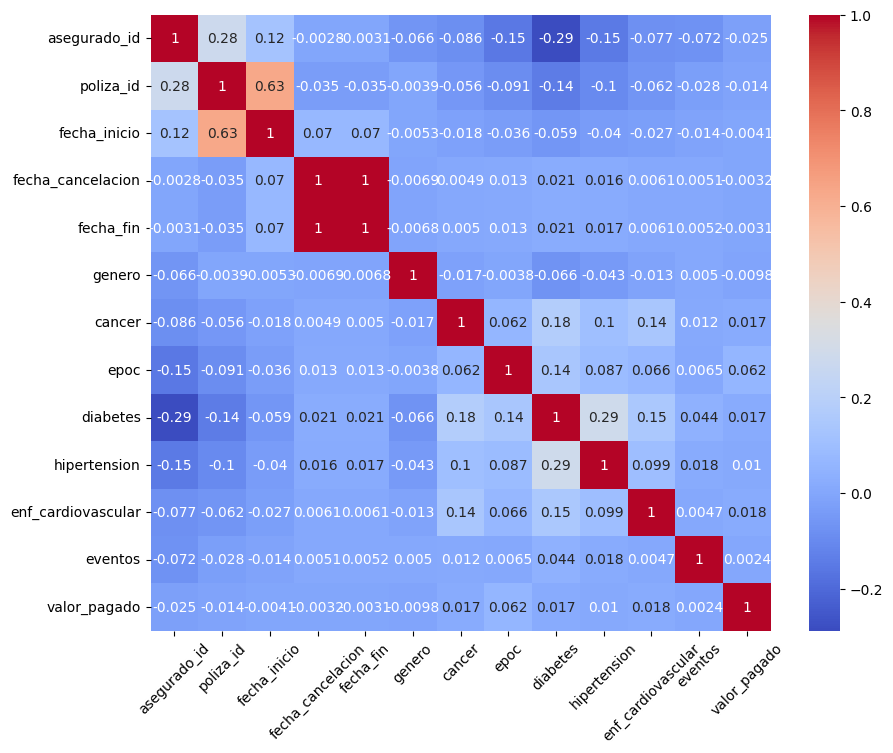

In [38]:
numeric_vars = df.select_dtypes(include=['number', 'datetime64[ns]', 'int64', 'float64'])

correlation_matrix = numeric_vars.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

ax.set_xticklabels(correlation_matrix.columns, rotation=45)
ax.set_yticklabels(correlation_matrix.columns, rotation=0)

plt.show()

In [ ]:
df.drop(['fecha_inicio', 'fecha_fin', 'fecha_cancelacion'], inplace = True, axis = 1)